In [1]:
import pandas as pd
import numpy as np

In [2]:
#Characters in Italian names are causing the apperence of two Name columns (I think).

argentina = pd.read_csv('argentina.csv')
australia = pd.read_csv('australia.csv')
england = pd.read_csv('england.csv')
france = pd.read_csv('france.csv')
georgia = pd.read_csv('georgia.csv')   
ireland = pd.read_csv('ireland.csv')
italy = pd.read_csv('italy.csv')  
new_zealand = pd.read_csv('new-zealand.csv')
scotland = pd.read_csv('scotland.csv')
south_africa = pd.read_csv('south-africa.csv')
wales = pd.read_csv('wales.csv')

frames = [argentina, australia, england, france, ireland, italy, new_zealand,
          scotland, south_africa, wales]
combined = pd.concat(frames).reset_index(drop = True)


combined['Height'] = combined['Height'].map(lambda x: x.strip('cm')).astype(int)
combined['Weight'] = combined['Weight'].map(lambda x: x.strip('kg')).astype(int)
combined["Mass"] = (combined["Height"]/100) * combined["Weight"]

#Create targets for the Linear Regressor to predict. The class to predict must be a number (0,1,2), not a string (Lock, Prop, Fly Half)
combined["Target"] = 3
combined.Target[combined.Position == "Lock"] = 0
combined.Target[combined.Position == "Prop"] = 1
combined.Target[combined.Position == "Fly Half"] = 2

combined.head()

C:\Users\maniacalbrain\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maniacalbrain\Anaconda\lib\site-packages\IPython\kernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maniacalbrain\Anaconda\lib\site-packages\IPython\kernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Debut,Height,Matches,Name,Points_Scored,Position,Red_Cards,Tries_Scored,Weight,Yellow_Cards,﻿Name,Mass,Target
0,23,17 May 2014,198,20,Matias Alemanno,10,Lock,0,2,112,0,NaN,221.76,0
1,32,04 Dec 2004,186,65,Marcos Ayerza,5,Prop,0,1,113,1,NaN,210.18,1
2,30,23 Apr 2005,182,46,Agustín Creevy,10,Hooker,0,2,106,0,NaN,192.92,3
3,32,08 Nov 2008,190,20,Juan Pablo Orlandi,5,Prop,0,1,119,0,NaN,226.10,1
4,33,28 Apr 2004,191,71,Juan Martín Fernandez Lobbe,25,Back Row,0,5,106,2,NaN,202.46,3


In [3]:
#Take only those who have targets 0,1,2
rugby_df = combined[combined.Target.isin([0,1,2])]
rugby_df.head()

,Age,Debut,Height,Matches,Name,Points_Scored,Position,Red_Cards,Tries_Scored,Weight,Yellow_Cards,﻿Name,Mass,Target
0,23,17 May 2014,198,20,Matias Alemanno,10,Lock,0,2,112,0,NaN,221.76,0
1,32,04 Dec 2004,186,65,Marcos Ayerza,5,Prop,0,1,113,1,NaN,210.18,1
3,32,08 Nov 2008,190,20,Juan Pablo Orlandi,5,Prop,0,1,119,0,NaN,226.10,1
5,28,12 Jun 2010,203,25,Mariano Galarza,0,Lock,0,0,115,1,NaN,233.45,0
6,26,07 Jun 2014,191,20,Ramiro Herrera,0,Prop,0,0,130,1,NaN,248.30,1


In [4]:
np.unique(rugby_df.Position)

array(['Fly Half', 'Lock', 'Prop'], dtype=object)

Populating the interactive namespace from numpy and matplotlib


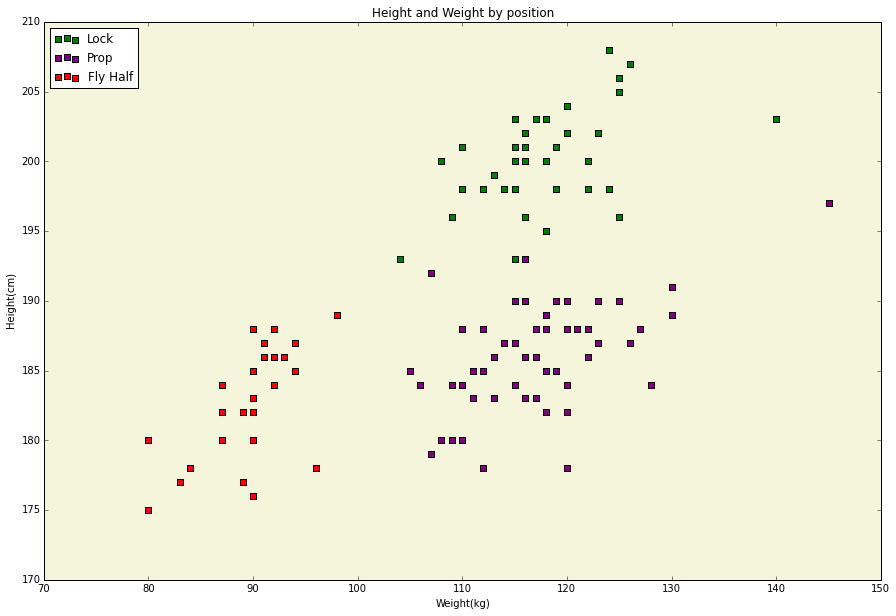

In [5]:
#Create a scatter plot of the 3 positions by height and weight

import matplotlib.pyplot as plt
%pylab inline

positions = ["Lock", "Prop", "Fly Half"]
com_colors = ["green", "purple", "red"]

fig = plt.figure(figsize = (15,10))
plt.subplot('111', axisbg='beige')

for i in range(len(positions)):
    plt.scatter(rugby_df.Weight[rugby_df.Position == positions[i]], 
                rugby_df.Height[rugby_df.Position == positions[i]], 
                c=com_colors[i], 
                marker = "s", 
                s=35, 
                label=positions[i])

plt.title("Height and Weight by position")    
plt.xlabel("Weight(kg)")
plt.ylabel("Height(cm)")
#plt.bgcolor("beige")

plt.legend(loc='upper left');

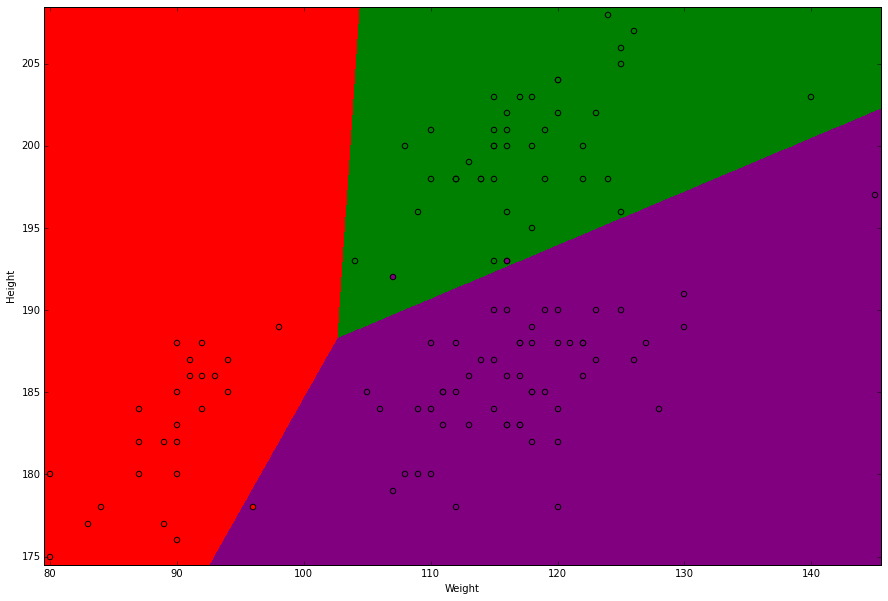

In [6]:
#Much of the following block is taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

from sklearn import linear_model
from matplotlib.colors import ListedColormap

features = pd.concat([rugby_df.Weight, rugby_df.Height], axis = 1) #using Height and Weight
X = features.values  #convert X and Y to numpy.ndarrays
Y = rugby_df.Target.values

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
cmap_colors = ListedColormap(com_colors)
plt.pcolormesh(xx, yy, Z, cmap=cmap_colors)

# Plot also the training points
#plt.scatter(rugby_df.Weight, rugby_df.Height, c=Y, edgecolors='k', cmap=plt.cm.Paired)

for i, color in zip(logreg.classes_, com_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, s=30) 
                #cmap=plt.cm.Paired)

plt.xlabel('Weight')
plt.ylabel('Height')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [7]:
#Checking what position I would be put in
#Weight, Height
test = [85, 184]
print positions[logreg.predict(test)]

Fly Half


In [8]:
pred = logreg.predict(X)
logreg.score(X,Y)

0.97560975609756095